In [78]:
# Homework 3 (due 07/16/2024)
# Math 76
# Arnav Singh

# Eigenbears

## Instructions

#### Part 1: Data preparation (ALREADY COMPLETED)
The folder that contains this notebook also contains a data set of pictures of pandas and brown bears. 
1. Load the images for train and test.
2. Reduce their size/resolution by 50%.
3. Convert the colors to grey scale.
4. Display a few of the images. 

#### Part 2: Singular value decomposition (FOR YOU TO COMPLETE)
1. Follow the steps in the eigenfaces tutorial from the UW databook [[link]](https://github.com/dynamicslab/databook_python/blob/master/CH01/CH01_SEC06_2_3_4.ipynb) to perform an SVD on the images.
2. Note that you will need to "center the data" before doing the SVD. Data centering means replacing each variable $X_i$ with a new variable $X_i'$ that is equal to $X_i$ minus $X_i$'s mean value. (Think carefully about whether you want to use the mean of train set, test set, or the full data set for this.)
3. Display the first four "eigenbears" (i.e., the images associated with the first four eigenvectors). Explain what you see.
4. The singular vectors are sometimes called "principal components". Principal component analysis (PCA) is a data analysis method for which one projects high-dimensional data into the subspace of the first two singular vectors. Use the code scaffold provided below do perform PCA for the bears data. What do you notice?

#### Part 3: Non-parametric supervised classification (PARTIALLY FOR YOU TO COMPLETE)
1. Build a $k$-nearest-neighbors model with the train set, and test its accuracy on the test set. (ALREADY COMPLETE)
2. Try different values of $k$ between 1 and 15. For what value do you get the best test accuracy? (FOR YOU TO COMPLETE)
3. Which bears seem to be hard to classify? Display them.
4. What might make them hard to classify?

#### Part 4: Parametric supervised classification (PARTIALLY FOR YOU TO COMPLETE)
1. Try using logistic regression and LDA to classify the bears. 
2. What method gives you the best test accuracy? 
3. How does the result compare to the non-parametric classification?
4. One can use the absolute values of the regression coefficients to see which pixels have the greatest influence on the prediction of the logistic regression. Retrieving the coefficients $\beta_i$ for each pixel $X_i$ and displaying them as an image creates a "bear mask". This notebook includes code for creating that bear mask. Take a look at the bear mask and explain what you see.

#### Part 5: Robustness to additive white noise  (FOR YOU TO RUN AND COMMENT ON)
1. Rerun the code with `add_noise` set to True. The images of the bears should now be very noisy.
2. How does the additive noise affect the test accuracy of the various models and why?
3. How does additive noise affect the eigenbears and the bear mask?
4. Can you think of other types of noise that might affect the classification results differently?

--------------------------------

In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os, time

## Part 1: Data preparation
The folder that contains this notebook also contains a data set of pictures of pandas and brown bears.
1. Load the images for train and test.
2. Reduce their size/resolution by 50%.
3. Convert the colors to grey scale.
4. Display a few of the images.

In [80]:
# toggle settings
add_noise = False

# Initiliaze lists for image collection
train_images = []
test_images = []

for i, images in enumerate([train_images, test_images]):

    # set paths to images of pandas and bears in train and test set
    datasetname = ['Train','Test'][i]
    folder_path1 = 'PandasBears/{}/Pandas/'.format(datasetname)
    folder_path2 = 'PandasBears/{}/Bears/'.format(datasetname)
    

    for folder_path in [folder_path1, folder_path2]:

        # print the name of the folder that is currently being processed
        print(folder_path, end=' ')
        
        # go through all files in the folder
        file_count = 0
        for filename in os.listdir(folder_path):
            
            # find the files that are JPEGs
            if filename.endswith(".jpg") or filename.endswith(".jpeg"):

                # add 1 to the file count
                file_count += 1
                
                # Construct full file path
                file_path = os.path.join(folder_path, filename)
    
                # import image
                image = plt.imread(file_path, format='jpeg')
    
                # convert to gray scale
                image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])
    
                # decrease image size by 50%
                image = image[::2,::2]

                if add_noise:
                    # add some noise
                    image = image + np.random.normal(scale=100, size=image.shape)
    
                # add the new image to collection
                images.append(image)

        print('has {} images'.format(file_count))

PandasBears/Train/Pandas/ has 250 images
PandasBears/Train/Bears/ has 250 images
PandasBears/Test/Pandas/ has 50 images
PandasBears/Test/Bears/ has 50 images


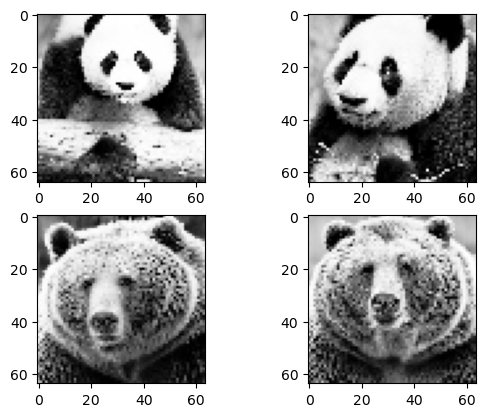

In [81]:
# look at 4 random bears
for i0, i in enumerate(np.random.randint(0, 500, size=4)):
    plt.subplot(2,2,1+i0)
    plt.imshow(train_images[i][::2,::2],cmap='Greys_r')

# Part 2: Singular value decomposition
1. Follow the steps in the eigenfaces tutorial from the UW databook [[link]](https://github.com/dynamicslab/databook_python/blob/master/CH01/CH01_SEC06_2_3_4.ipynb) to perform an SVD on the images.
2. Note that you will need to "center the data" before doing the SVD. Data centering means replacing each variable $X_i$ with a new variable $X_i'$ that is equal to $X_i$ minus $X_i$'s mean value. (Think carefully about whether you want to use the mean of train set, test set, or the full data set for this.)
3. Display the first four "eigenbears" (i.e., the images associated with the first four eigenvectors). Explain what you see.
4. The singular vectors are sometimes called "principal components". Principal component analysis (PCA) is a data analysis method for which one projects high-dimensional data into the subspace of the first two singular vectors. Use the code scaffold provided below do perform PCA for the bears data. What do you notice?

In [82]:
# Construct data matrix of centered data
'''ADD SOME CODE HERE'''
#Declaring the array's as np to use them
train_images = np.array(train_images)
test_images = np.array(test_images)
#acquring the datas
flattened_images = train_images.reshape(500, 128*128)
avgBear = np.mean(train_images,axis=0).flatten()
#centering the data
center_matrix = flattened_images - np.tile(avgBear[np.newaxis,:], (500,1))
center_matrix= center_matrix.T         #transposes the matrix

# Perform SVD
U, S, Vh = np.linalg.svd(center_matrix, full_matrices = False) 
# replace A with your centered data matrix

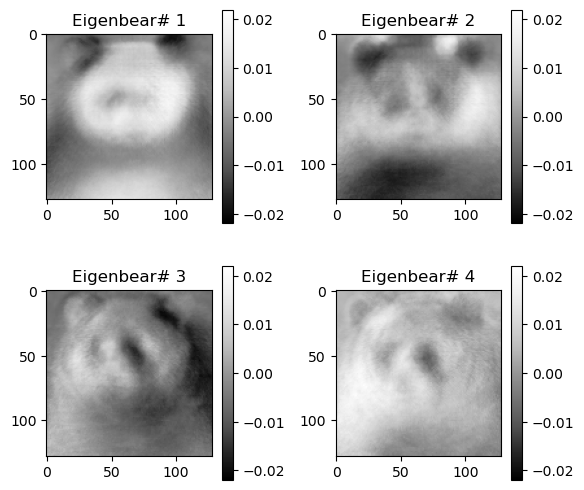

In [83]:
# show the first four eigenbears
for i in range(4):
    plt.subplot(2,2,1+i)
    plt.imshow((U[:,i]).reshape((128,128)), cmap='Greys_r',
        # force colormap to be the same for all four
        vmin=-np.max(np.abs(U[:,:4])),
        vmax=np.max(np.abs(U[:,:4])))
    plt.colorbar()
    #adding title to track which bear is which
    plt.title(f"Eigenbear# {i+1}")
plt.subplots_adjust(wspace=0.4, bottom = -0.1)

### Step 2.3 Explanation
In the plots above it is clear that the eigenbears do not entirely resemble the bears from earlier, however it can be seen that they do indeed resemble some characteristics, as per the point of the SVD. For example, the bottom two bears (I realized that the randomness changes where each bear is too, so now it is top 2) do have some look of a panda bear as from earlier, and the top two do have the grizzly bear characteristics, but they are all blended in together. The SVD gives us what is considered the most important in both pandas and grizzly, and then what is plotted is trying to start to differentiate between the two. To the unaided eye, all 4 eigenbears can look like bears, not really any type of bear though: that will come in the next steps. 


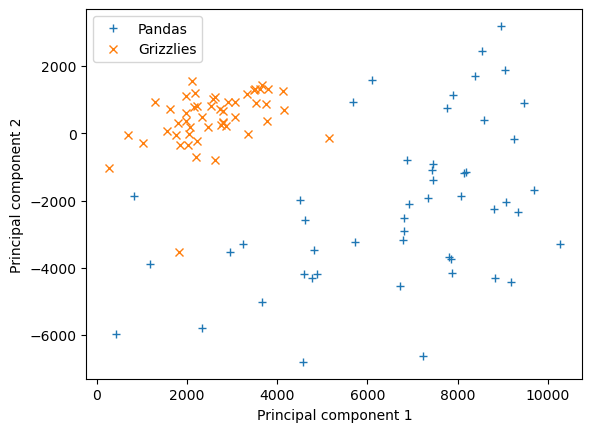

In [84]:
# Clustering of panda bears and brown bears along the first and second principal component
# indices of pandas in the test set
indices_pandas = range(50)
# indices of brown bears in the test set
indices_brownbears = range(50,100)

for i, indices in enumerate([indices_pandas, indices_brownbears]):
    # get projections of data onto principal component 1
    p1 = [np.dot(U[:,0],np.ravel(test_images[x])) for x in indices]
    # get projections of data onto principal component 2
    p2 = [np.dot(U[:,1],np.ravel(test_images[x])) for x in indices]
    plt.plot(p1, p2, marker='+x'[i], lw=0, label=['Pandas', 'Grizzlies'][i])

# annotate axes
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
# add legend
plt.legend()

### Step 2.4 Explanation
In this PCA, we can see that the grizzly bears are clustered in the top left, while the panda bears are in towards the right but more scattered. We can sense that grizzly bears have more of the same features throughout, while panda bears might have more variability in how they look, since the grizzly bears can be decomposed into the 2 principal components easier than the 2 pandas. It is interesting to note that the points that are far away from the cluster will likely be the points that are hard to classify in the next part of the homework.

# Part 3: Nonparametric classification
1. Build a $k$-nearest-neighbors model with the train set, and test its accuracy on the test set. (ALREADY COMPLETE)
2. Try different values of $k$ between 1 and 15. For what value do you get the best test accuracy? (FOR YOU TO COMPLETE)
3. Which bears seem to be hard to classify? Display them.
4. What might make them hard to classify?

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
# construct response variable: Train set was created by appending 250 pandas
# and THEN 250 brown bears to the list of training images. We code pandas as
# '0' and brown bears as '1'.
y_train =  np.concatenate([np.zeros(250), np.ones(250)])

# Test set was created by appending 50 pandas and THEN 50 brown bears to the 
# list of test images. We code pandas as '0' and brown bears as '1'.
y_test = np.concatenate([np.zeros(50), np.ones(50)])

In [87]:
#Needs these to fit KNN model
x_train = train_images.reshape(500, 128*128)
x_test = test_images.reshape(100, 128*128)

print('   k\t|  # errors\t| misclassified bears')
print('--------------------------------------------')
errors = [] #to track the number of errors

for k in range(1, 16):
    # fit KNN model
    modelKN = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
    # use model to make predictions on the test set
    predictionsKN = modelKN.predict(x_test)
    # detect misclassifications
    errorsKN = np.abs(predictionsKN - y_test)
    # print results to table
    print('    {}\t|      {} \t| {}'.format(k, int(np.sum(errorsKN)), (np.argwhere(errorsKN).T)[0]))
    errors.append(int(np.sum(errorsKN)))

print(f"Average number of errors: {np.mean(errors)}")

   k	|  # errors	| misclassified bears
--------------------------------------------
    1	|      1 	| [39]
    2	|      0 	| []
    3	|      2 	| [39 42]
    4	|      1 	| [42]
    5	|      3 	| [36 39 42]
    6	|      2 	| [36 42]
    7	|      4 	| [22 36 41 42]
    8	|      2 	| [22 42]
    9	|      4 	| [ 6 22 36 42]
    10	|      3 	| [ 6 22 42]
    11	|      4 	| [ 6 22 41 42]
    12	|      4 	| [ 6 22 41 42]
    13	|      5 	| [ 6 22 39 41 42]
    14	|      5 	| [ 6 22 39 41 42]
    15	|      7 	| [ 6 11 22 24 39 41 42]
Average number of errors: 3.1333333333333333


### Step 3.2: Best Accuracy
The value of k with the best accuracy is k=2, as there are no misclassified bears under this. So that means using two bears nearest to the one will yield the correct prediction. Additionally, seen below, all the misclassified bears happen to be pandas classified as grizzly bears, not the other way around (due to clustering probably). Accuracy is 100%, very good. 

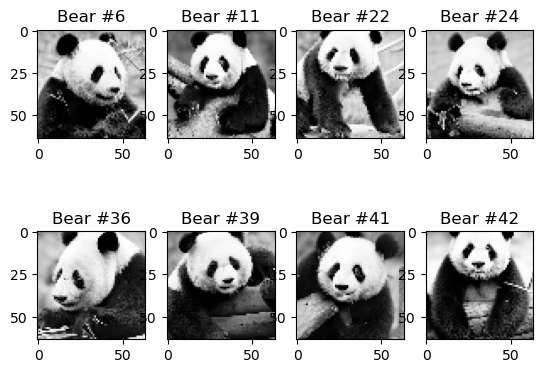

In [88]:
# Show hard-to-classify bears
'''ADD SOME CODE'''
# Misclassified bears are given in the right side of the table, and below are all the ones that got misclassified at least once
for i0, i in enumerate([6, 11, 22, 24, 36, 39, 41, 42]):
    plt.subplot(2,4,1+i0)
    plt.imshow(test_images[i][::2,::2],cmap='Greys_r')
    plt.title(f"Bear #{i}")
# The most commonly misclassified ones are 6, 22, 39, 42

### Step 3.4: Why Hard to Classify?
These Pandas seem hard to classify due their different poses which may be mistaken with some of the grizzly bear photos with poses too. It might be that these pandas are close to the grizzly's cluster when doing the PCA. Additionally, the inclusion of a log or branch within frame might mess with the SVD making it more fuzzy, and more likely to make the mistake of classify the panda as a grizzly bear. Additionally, the pandas might have a training set that includes grizzly in a similar position, also resulting in a misclassification. 

# Part 4: Parametric classification
1. Try using logistic regression and LDA to classify the bears. 
2. What method gives you the best test accuracy? 
3. How does the result compare to the non-parametric classification?
4. One can use the absolute values of the regression coefficients to see which pixels have the greatest influence on the prediction of the logistic regression. Retrieving the coefficients $\beta_i$ for each pixel $X_i$ and displaying them as an image creates a "bear mask". This notebook includes code for creating that bear mask. Take a look at the bear mask and explain what you see.

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#added this to see what reports do
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
'''ADD SOME CODE'''#ok

# Logistic Regression
lg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
modelLoG = lg.fit(x_train, y_train)
# use model to make predictions on the test set
predictionsLG = modelLoG.predict(x_test)
# detect misclassifications for LG
errorsLG = np.abs(predictionsLG - y_test)
# print results to table
print('LOG #errors: {} \t & misclassified bears: {}'.format(int(np.sum(errorsLG)), (np.argwhere(errorsLG).T)[0]))

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
modelLDA = lda.fit(x_train, y_train)
# use model to make predictions on the test set
predictionsLDA = modelLDA.predict(x_test)
# detect misclassifications for LDA
errorsLDA = np.abs(predictionsLDA - y_test)
# print results to table
print('LDA #errors: {} \t & misclassified bears: {}'.format(int(np.sum(errorsLDA)), (np.argwhere(errorsLDA).T)[0]))
'''its broken
# Also Quadratic Discriminant Analysis cause why not
qda_model = QuadraticDiscriminantAnalysis()
#fit it
qda_model.fit(x_train, y_train)
qda_predictions = qda_model.predict(test_images)
#detect misclassification for QDA
errorsQDA = np.abs(qda_predictions - y_test)
#print results
print('QDA #errors: {} \t & misclassified bears: {}'.format(int(np.sum(errorsQDA)), (np.argwhere(errorsQDA).T)[0]))
'''
#Reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test, predictionsLG))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictionsLG))

print("LDA Classification Report:")
print(classification_report(y_test, predictionsLDA))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictionsLDA))
'''
print("QDA Classification Report:")
print(classification_report(y_test, qda_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, qda_predictions))
'''

LOG #errors: 0 	 & misclassified bears: []
LDA #errors: 1 	 & misclassified bears: [72]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix:
[[50  0]
 [ 0 50]]
LDA Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        50
         1.0       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix:
[[50  0]
 [ 1 49]]


'\nprint("QDA Classification Report:")\nprint(classification_report(y_test, qda_predictions))\nprint("Confusion Matrix:")\nprint(confusion_matrix(y_test, qda_predictions))\n'

### Step 4.2 & 4.3
The Logistic Regression gave the best test accuracy as there were 0 errors, while the Linear Discriminant Analysis gave 1 error. Accuracy is really high for both

Compared to the non-parametric classification, these parametric models performed significantly better, but the Logisitic same as the k=2 and LDA same as k=1 for KNN, respectively. 

Text(0.5, 1.0, 'Logistic Regression Coefficients (Absolute Values)')

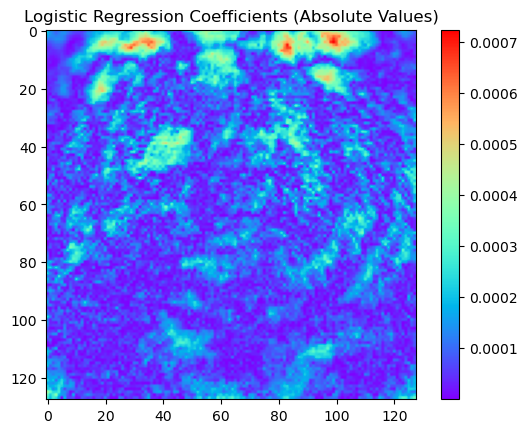

In [91]:
# Construct the bear mask:
# Show absolute value of logistic-regression coefficients for each pixel
plt.imshow(np.abs((modelLoG.coef_).reshape((128,128))), cmap ='rainbow') #added rainbow to make it cooler
plt.colorbar()
plt.title('Logistic Regression Coefficients (Absolute Values)') #added title

### Step 4.4: What we see in Bear Mask
In the Bear mask, we see that the areas that are hotter (aka. larger absolute value and more red) indicate the features that help to classify the bears. For instance, the ears are red, indicating that pandas and grizzly bears have different ears that are used by the Logistic regression when classifying. Additionally, we can see that there are some hotspots around the eyes, which is also another difference between grizzly bears and panda bears, as the colors are also different there. 


#### Part 5: Robustness to additive white noise  (FOR YOU TO RUN AND COMMENT ON)
1. Rerun the code with `add_noise` set to True. The images of the bears should now be very noisy.
2. How does the additive noise affect the test accuracy of the various models and why?
3. How does additive noise affect the eigenbears and the bear mask?
4. Can you think of other types of noise that might affect the classification results differently?

### Answers to Question 5
1. Yes very noisy, like old T.V. Also cool to see that the PCA flipped axis too. 
2. The additive noise affected the test accuracy of the various models by decreasing the accuracy, but not by too much. For example, in the KNN the model went from an error rate of 3.1333333, to 3.26666. However, it is interesting to see that for with noise, k=1,2,3,4 the number of misclassified bears was 0, and yet the overall error was still higher. While, without noise, only k=2 had no misclassification. I see that if I rerun the code, the errors do change, but it remains greater than without noise. Though this might suggest that their might be some overfitting of the model since it now performs well with lower k values with some noise.  Additionally, for the parametric models, both models now have errors including the Logistic Regression one. Interestingly, the bear that was misclassified in both is now bear 42, and no longer bear 72 from without noise. So overall, the accuracy of the models decreased due to the noise, but not that much as with the KNN the error is distributed evenly across the pixels with noise, so the difference is 0, and with the parametric models it does not affect the weights of the coefficients that matter by too much (the same coeffecients are still strong). 
3. The additive noise affects the eigenbears by inverting their colors (also shown by the flipping of the PCA axis too), and the eigenbears are only slightly fuzzy as they get rid of most of the noise introduced. The bear mask, all the coefficients weights have decreased substantionally, with the mask still being prominent. However, the bear loses its outline from before. 
4. Other types of noise that would affect the classification results differently would be some type of random noise, instead of this white noise, which would affect random pixels, thereby skewing some models to be more inaccurate. Additionally, the use of a Gaussian Noise would also affect the classification results differently, as the pixels would then be more blurred, and making it harder for some models such as LDA to ascertain which pixels are important for the decisions. There are probably more types of noise, with a quick search & in textbook, I found that Salt and Pepper, Occlusion, Adversarial Noise, and Systematic Bias are all types that can affect classification. 

Note: I am not sure whether to leave Noise = True or False, so I put it at false and reran. feel free to check with True too